# MLBD - 

## Lab - Feature Selection -




## Exercise 1 - Noisy Iris -

- Developed by _Gary Marigliano - July 2018_

- Modified by _Shabnam Ataee - March 2020_

## Assistant -
Shabnam Ataee

## Introduction -

First, read _ReadMe_ notebook and install required packages for this lab.

In this exercise, the [famous iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset has been modified to insert noisy features. The goal is to retrieve 4 original features (sepal length/width and petal length/width) using feature selection models.

You can use some feature selection algorithms listed here (the python library should already be installed for this exercise): http://featureselection.asu.edu/html/skfeature.function.html and http://featureselection.asu.edu/tutorial.php

## ToDo in this notebook -

Answer to questions in this notebook where **_ToDo_** is written.

## Group members -

As mentioned in the _ReadMe_ notebook, during this lab you will work in groups composed of 2 or 3 students. Please specify firstname, lastname and email address of group members here.

## Setup the Iris dataset -

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
%matplotlib inline

Below the dataset is modified to create new noisy features to the iris dataset.

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

## Add some noisy features in the iris dataset

# Add a feature that is always equal to a constant independently of the output --> useless feature
constant_features = np.array([[12 for _ in range(X.shape[0])]]).transpose()
X = np.append(X, constant_features, axis=1)

# Add random noisy features. 
# These features are created using the first feature values with a more or less important noise level
noise_levels = np.arange(1, 6, 0.3)
first_feat = X[:, 1]

n_samples = X.shape[0]
for k in noise_levels:
    noise = k*(np.random.rand() * 2 - 1)
    noisy_features = [noise + first_feat[x] for x in range(n_samples)]
    noisy_features = np.array([noisy_features]).transpose()
    X = np.append(X, noisy_features, axis=1)

# Here we can see that the 5th column is always equals to 12. The colunms after it are the noisy features.
print(X[:3, :])

[[ 5.1         3.5         1.4         0.2        12.          2.50110744
   2.83431141  1.99620069  3.63545336  5.1590246   4.30519787  6.06614607
   0.47366071  6.52782521  1.75537141  5.00935383  4.26591765  5.78975435
   5.91674724  3.52534988  7.58913472 -2.01429483]
 [ 4.9         3.          1.4         0.2        12.          2.00110744
   2.33431141  1.49620069  3.13545336  4.6590246   3.80519787  5.56614607
  -0.02633929  6.02782521  1.25537141  4.50935383  3.76591765  5.28975435
   5.41674724  3.02534988  7.08913472 -2.51429483]
 [ 4.7         3.2         1.3         0.2        12.          2.20110744
   2.53431141  1.69620069  3.33545336  4.8590246   4.00519787  5.76614607
   0.17366071  6.22782521  1.45537141  4.70935383  3.96591765  5.48975435
   5.61674724  3.22534988  7.28913472 -2.31429483]]


In [3]:
X[0].shape

(22,)

In [4]:
X.shape

(150, 22)

Next, we start selecting relevant features. To do that, we do "Data Preparation" phase of data science pipeline.

This means we need to split the data into a train set (67%) and a test set (33%).


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

For this notebook, the example below shows how to train and get the features sorted by decreasing importance.

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

# train
clf = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf.fit(X_train, y_train)

# get the score
score = clf.score(X_test, y_test)
print("score {:.3f}".format(score))

# rank the features
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

n_features = X_train.shape[1]

# get the features sorted by decreasing importance
feat_importances_sorted = [(indices[f], importances[indices[f]]) for f in range(n_features)]

score 0.900


**_ToDo_**: 
* Draw feature importance plot using a bar chart (see picture below)
* Answer the following questions:
   * What does this plot represent?
       * **Each score for a feature represents the importance of that feature in relation to the prediction of the response variable.**
   * How do you compare two features using this plot?
       * **You can compare two features by comparing the height of the bar.**
   * How would you choose a "good" number of features?
       * **You have to choose enough features to keep as much importance as possible (in our example it could be 3).**
   * How can you be sure that the features you have been selected are relevant? What kind of tasks should you do ?
       * **We can try to regenerate the input data, in our case the numbers and see if they are still of good quality (readable). We can try to retrained the model with the new features and compare the metrics.**
   * How could you prove it?
       * **We can try to regenerate the input data or to run a test set on our new model and check the metrics.**
   * For this modified dataset, is it really useful to reduce the number of features?
       * **No in this case the images are quite small (11x11) and it is quite reasonable to train a model with 22 features. However, in a problem with lot of dimensions, reducing the dimensions can be useful.**
   * How easy/hard is it to retrieve the original features?
       * **It can be quite difficult to regenerate the original data.**

<img src="pictures/01-noisy-iris-feat-importances-example.png" />

Text(0.5, 1.0, 'Score per feature')

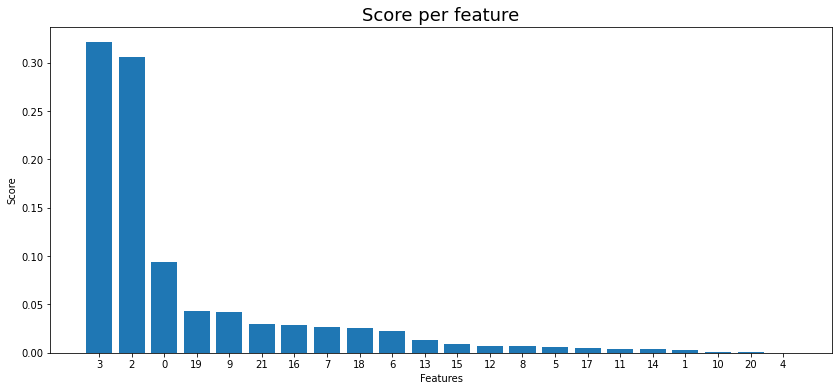

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
ax_features, ax_importances = zip(*feat_importances_sorted)
ax_features = [str(i) for i in ax_features]
ax.bar(ax_features, ax_importances)
ax.set_xlabel('Features')
ax.set_ylabel('Score')
ax.set_title('Score per feature', fontsize=18)

## Choose the best _n_ features -

Now that we have the features sorted by decreasing importances, your task is to choose the best ones.

In [8]:
# This function plots the confusion matrix.
# You can use this function to plot confusion matrix.

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**_ToDo_**:

* Choose _n_ features that you find relevant.
    * **We choose to select 3 features (0, 2 and 3)**
* Justify the number _n_ that you have chosen.
    * **We choose these features beacause they allow to keep the most importance.**
* Select confusion matrix or another relevant score metric and compare the classifier performance between:
    * your selected features and the noisy iris dataset 
        * **We notice a slightly better improvement between the noisy dataset and the model with choosen features. Howerver, we notice scores can differ between different trainings.** 
    * your selected features and some _n_ random features (take the average score of K runs for random features)
        * **With combinatorial search, we can see worst performance compare to model with selected features.**
    * your selected features and the worst _n_ features (look at your feature importance plot)
        * **In this case we constat this new model is decreasing in performance comparing to the model with the selected features**
* Answer the following questions:
    * Among the features you have selected, how many are the original ones?
        * **The 3 selected features are the same as the original one.**
    * Among the features you have selected, is there any useless feature (the one which always contains the same value)?
        * **No, the only features with same value is the fourth features but she is not selected.**
        
To plot a prettier confusion matrix you can use the follwoing code:

``` python
y_pred = clf.predict(X_test_random)
cm = confusion_matrix(y_test, y_pred)
n_classes = len(np.unique(y))
plot_confusion_matrix(cm, classes=range(n_classes), title="Confusion Matrix")
```

In [9]:
n = 3

## Original features

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.85      0.87        20
           2       0.80      0.86      0.83        14

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



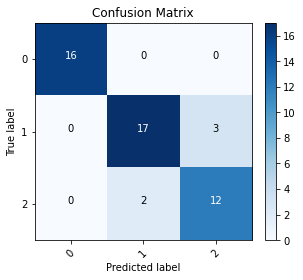

In [10]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
n_classes = len(np.unique(y))
plot_confusion_matrix(cm, classes=range(n_classes), title="Confusion Matrix")

print(classification_report(y_test, y_pred))

## Selected features

In [11]:
best_features, _ = zip(*feat_importances_sorted[:n])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.84      1.00      0.91        16
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.95      0.93      0.93        50
weighted avg       0.95      0.94      0.94        50

Selected features scores : 0.94


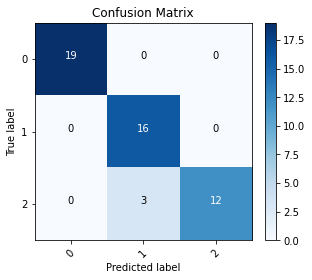

In [34]:
X_reduced = X[:,best_features]

X_train_selected_features, X_test_selected_features, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33)

clf_selected_features = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf_selected_features.fit(X_train_selected_features, y_train)

y_pred_selected_features = clf_selected_features.predict(X_test_selected_features)
cm = confusion_matrix(y_test, y_pred_selected_features)
n_classes = len(np.unique(y))
plot_confusion_matrix(cm, classes=range(n_classes), title="Confusion Matrix")

print(classification_report(y_test, y_pred_selected_features))

selected_features_score = clf_selected_features.score(X_test_selected_features, y_test) 
print(f"Selected features scores : {selected_features_score}")

## Random features (Combinatorial search)

In [13]:
features = list(range(0,22))
from random import sample

In [28]:
from sklearn.metrics import accuracy_score, f1_score

In [29]:
K = 10
mean_score = []

for i in range(K):
    random_features = sample(features, n)
    
    X_random = X[:,random_features]
    X_train_random, X_test_random, y_train, y_test = train_test_split(X_random, y, test_size=0.33)

    clf_random = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
    clf_random.fit(X_train_random, y_train)    
    
    score = clf_random.score(X_test_random, y_test)
    mean_score.append(score)

In [32]:
print(f"Mean score : {sum(mean_score)/ len(mean_score)}")

Mean score : 0.546


## Worst Features

In [19]:
worst_features, _ = zip(*feat_importances_sorted[-n:])

In [20]:
X_worst = X[:, worst_features]

              precision    recall  f1-score   support

           0       0.29      0.31      0.30        13
           1       0.38      0.42      0.40        19
           2       0.47      0.39      0.42        18

    accuracy                           0.38        50
   macro avg       0.38      0.37      0.37        50
weighted avg       0.39      0.38      0.38        50



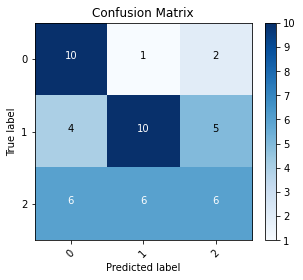

In [21]:
X_train_worst, X_test_worst, y_train, y_test = train_test_split(X_worst, y, test_size=0.33)

clf_selected_features = ExtraTreesClassifier(n_jobs=2, n_estimators=10)
clf_selected_features.fit(X_train_worst, y_train)

y_pred_worst = clf_selected_features.predict(X_test_worst)
cm = confusion_matrix(y_test, y_pred_worst)
n_classes = len(np.unique(y))
plot_confusion_matrix(cm, classes=range(n_classes), title="Confusion Matrix")

print(classification_report(y_test, y_pred_selected_features))

### Going further (optional) -

Now that you finished this notebook, it can be interesting to go one step further and try following scenarios:

* Can we achieve better results (i.e. more relevant features and/or less features) if we normalize the data set?
* Can we retrieve the same relevant features by applying another feature selection model?
* Plot the classifier performance for the best K features where K is $1, 2,..,k_{-1},k$ and comment the results.
* ...

Please answer to the above questions below in this notebook.